In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/refs/heads/master/ann_logistic_extra/ecommerce_data.csv

--2025-05-10 11:21:11--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/refs/heads/master/ann_logistic_extra/ecommerce_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12381 (12K) [text/plain]
Saving to: ‘ecommerce_data.csv.1’

ecommerce_data.csv. 100%[===================>]  12.09K  --.-KB/s    in 0.001s  

2025-05-10 11:21:11 (14.9 MB/s) - ‘ecommerce_data.csv.1’ saved [12381/12381]



In [56]:
def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    # df.head()
    # easier to work with numpy array
    data = df.to_numpy()

    # shuffle our data, by the row. The columns don't get mixed
    np.random.shuffle(data)

    # split features and labels
    X = data[:, :-1]
    Y = data[:, -1].astype(np.int32)

    # one-hot encoding for time of day
    N, D = X.shape
    X2 = np.zeros((N, D+3))  # add only three because we can replace one column
    X2[:, :(D-1)] = X[:, :(D-1)]

    for n in range(N):
        t = int(X[n, D-1])  # t is the value in that cell
        X2[n, t+D-1] = 1    # puts a value of 1 in the t-th column of that row
                            # adds 1 in col. 7 for a value 3, adds 1 in col. 6

    # method 2 (more efficient)
    # Z = np.zeros((N, 4))
    # Z[np.arange(N), X[:, D-1].astype(np.int32)] = 1
    # Z[(r1, r2, r3, ...), (c1, c2, c3, ...)] = value
    # X2[:, -4:] = Z

    # assign X2 back to X
    X = X2

    # split train and test
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]

    # normalize columns 1 and 2
    for i in (1, 2):
        m = Xtrain[:, i].mean()
        s = Xtrain[:, i].std()
        Xtrain[:, i] = (Xtrain[:, i] - m) / s
        Xtest[:, i] = (Xtest[:, i] - m) / s

    return Xtrain, Ytrain, Xtest, Ytest

In [57]:
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [58]:
Xtrain, Ytrain, Xtest, Ytest = get_data()

D = Xtrain.shape[1]
K = len(set(Ytrain) | set(Ytest))

In [59]:
# convert Y target matrix to indicator
Ytrain_ind = y2indicator(Ytrain, K)
Ytest_ind = y2indicator(Ytest, K)

In [60]:
# randomly initialize weights
W = np.random.rand(D, K)
b = np.random.rand(K)

In [61]:
def softmax(a):
    expa = np.exp(a)
    return expa / expa.sum(axis=1, keepdims=True)

def forward(X, W, b):
    return softmax(X.dot(W) + b)

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

In [62]:
def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(Y, pY):
    return -np.mean(Y * np.log(pY))

In [63]:
train_costs = []
test_costs = []
learning_rate = 0.001
epochs = 30000

for epoch in range(epochs):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)

    # add costs to list of costs
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate * Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate * (pYtrain - Ytrain_ind).sum(axis=0)

    if epoch % 1000 == 0:
        print(f"{epoch}\t{ctrain:.4f}\t{ctest:.4f}")

0	0.4189	0.3934
1000	0.0888	0.0900
2000	0.0849	0.0842
3000	0.0835	0.0818
4000	0.0829	0.0805
5000	0.0825	0.0797
6000	0.0822	0.0792
7000	0.0821	0.0788
8000	0.0820	0.0785
9000	0.0819	0.0782
10000	0.0818	0.0781
11000	0.0818	0.0779
12000	0.0818	0.0778
13000	0.0817	0.0777
14000	0.0817	0.0776
15000	0.0817	0.0775
16000	0.0817	0.0774
17000	0.0817	0.0774
18000	0.0817	0.0773
19000	0.0817	0.0773
20000	0.0816	0.0772
21000	0.0816	0.0772
22000	0.0816	0.0772
23000	0.0816	0.0772
24000	0.0816	0.0771
25000	0.0816	0.0771
26000	0.0816	0.0771
27000	0.0816	0.0771
28000	0.0816	0.0771
29000	0.0816	0.0770


In [64]:
acc_train = classification_rate(Ytrain, predict(pYtrain))
acc_test = classification_rate(Ytest, predict(pYtest))
print(f"Final train classification rate:", acc_train)
print(f"Final test classification rate:", acc_test)

Final train classification rate: 0.915
Final test classification rate: 0.89


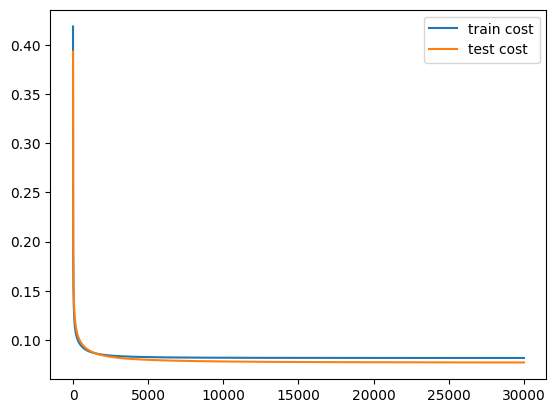

In [65]:
plt.plot(train_costs, label="train cost")
plt.plot(test_costs, label="test cost")
plt.legend();